

 na_x 

 [[8.000000e+02 1.330000e+04 5.500000e+04 7.492260e+03]
 [6.420000e+02 1.470000e+04 4.500000e+04 8.539470e+03]
 [5.990000e+02 2.250000e+04 4.037500e+04 9.625040e+03]
 [5.400000e+02 3.100000e+04 4.050000e+04 1.052421e+04]
 [3.500000e+02 6.300000e+04 3.875000e+04 1.111353e+04]
 [2.730000e+02 1.500000e+05 3.875000e+04 1.122708e+04]
 [2.090000e+02 2.139000e+05 3.875000e+04 1.226532e+04]
 [1.790000e+02 3.313000e+05 3.875000e+04 1.384190e+04]
 [1.580000e+02 5.160000e+05 1.325000e+04 1.473181e+04]
 [1.430000e+02 1.000000e+06 1.180000e+04 1.522216e+04]]


No handles with labels found to put in legend.





                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                    9
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -108.260
Method:                       css-mle   S.D. of innovations          39991.410
Date:                Mon, 22 Mar 2021   AIC                            230.521
Time:                        18:45:27   BIC                            231.901
Sample:                             1   HQIC                           227.542
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.486e+06   5.36e+05     -2.771      0.070   -2.54e+06   -4.35e+05
x1          -245.5462    214.341     -1.146      0.335    -665.646     174.554
x2             0.2472      0.213      1.160      

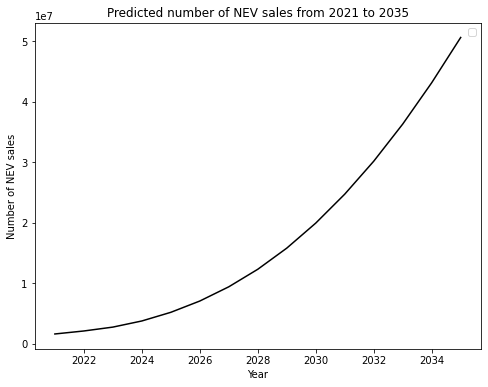

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt 
import pandas as pd 
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

def create_prediction_plot(predictions, xaxis):
  plt.figure(figsize=(8, 6))
  plt.plot(years, predictions, color="black")
  plt.title("Predicted number of NEV sales from 2021 to 2035")
  plt.xlabel("Year")
  plt.ylabel("Number of NEV sales")
  plt.legend()
  plt.show()
  plt.savefig('predicted_sales.png')


#read-in full data set
df_fulldata = pd.read_csv('nev_sales.csv')

#set 'year' column to index
df_fulldata.set_index('year', inplace=True)

#exctract subset of data
df_xtotal = df_fulldata[['batterycosts', 'chargingstations', 'incentives' ,'gdp']].copy()
df_x = df_xtotal.iloc[:10]
df_xpred = df_xtotal.iloc[10:]
df_y = df_fulldata[['sales']].copy()
df_y = df_y.iloc[:10]
na_y = df_y.to_numpy()
na_x = df_x.to_numpy()
na_xpred = df_xpred.to_numpy()




#specify ARIMA and fit to data
model = ARIMA(endog=na_y, exog=na_x, order=(1,1,0))
fitted_model = model.fit()

print('\n\n')

print(fitted_model.summary())

print('\n\n')

#make predictions
predictions = fitted_model.forecast(exog=na_xpred, steps=15)

#create plot with predictions
years = list(range(2021, 2036))
create_prediction_plot(predictions[0], years)